# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
output_data_file_df = pd.read_csv(output_data_file)
output_data_file_df.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

In [4]:
#making all necessary lists
city_names_list = []
the_cloudiness_list = []
date_list = []
lat_list = []
lng_list = []
humidity_list = []
temp_max_list = []
wind_speed_list = []
country_list = []
index_counter = 0
counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
print("Beginning Data Retrival")
print("-----------------------")

Beginning Data Retrival
-----------------------


In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"


In [7]:
query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=a0eb744a4c36e35bec2e64816e121829&units=metric&q='

In [8]:
for index, city in enumerate(cities, start = 1):
    response = requests.get(query_url + city).json()
    try:
        
        city_names_list.append(response["name"])
        the_cloudiness_list.append(response["clouds"]["all"])
        date_list.append(response["dt"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        humidity_list.append(response["main"]["humidity"])
        temp_max_list.append(response["main"]["temp_max"])
        wind_speed_list.append(response["wind"]["speed"])
        country_list.append(response["sys"]["country"])
        
        if index_counter > 49:
            index_counter = 0
            counter = counter + 1
            
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index} of Set {counter} : {city}")
        
    except:
        print("City not found. Skipping...")

Processing Record 1 of Set 1 : jamestown
Processing Record 2 of Set 1 : tigil
Processing Record 3 of Set 1 : norman wells
Processing Record 4 of Set 1 : korla
Processing Record 5 of Set 1 : wewak
Processing Record 6 of Set 1 : atuona
Processing Record 7 of Set 1 : port elizabeth
Processing Record 8 of Set 1 : bogorodskoye
Processing Record 9 of Set 1 : provideniya
Processing Record 10 of Set 1 : broken hill
Processing Record 11 of Set 1 : nizwa
Processing Record 12 of Set 1 : mar del plata
Processing Record 13 of Set 1 : luena
Processing Record 14 of Set 1 : ketchikan
Processing Record 15 of Set 1 : hilo
Processing Record 16 of Set 1 : vaini
City not found. Skipping...
Processing Record 18 of Set 1 : luderitz
Processing Record 19 of Set 1 : chuy
Processing Record 20 of Set 1 : new norfolk
Processing Record 21 of Set 1 : ilulissat
Processing Record 22 of Set 1 : hobart
City not found. Skipping...
Processing Record 24 of Set 1 : port hardy
Processing Record 25 of Set 1 : sinnamary
Proces

Processing Record 203 of Set 4 : port-gentil
Processing Record 204 of Set 4 : bubaque
Processing Record 205 of Set 4 : marsa matruh
Processing Record 206 of Set 4 : abu samrah
Processing Record 207 of Set 4 : katete
Processing Record 208 of Set 4 : masvingo
Processing Record 209 of Set 4 : belaya gora
Processing Record 210 of Set 4 : kloulklubed
Processing Record 211 of Set 4 : ulladulla
Processing Record 212 of Set 4 : nikolskoye
City not found. Skipping...
Processing Record 214 of Set 4 : acarau
Processing Record 215 of Set 4 : muravlenko
Processing Record 216 of Set 4 : butaritari
City not found. Skipping...
Processing Record 218 of Set 4 : chokurdakh
Processing Record 219 of Set 4 : asau
Processing Record 220 of Set 4 : cabedelo
Processing Record 221 of Set 4 : mount isa
Processing Record 222 of Set 4 : beatrice
Processing Record 223 of Set 4 : saint george
City not found. Skipping...
Processing Record 225 of Set 5 : cap malheureux
Processing Record 226 of Set 5 : adrar
Processing 

Processing Record 400 of Set 8 : tete
Processing Record 401 of Set 8 : kinkala
Processing Record 402 of Set 8 : marystown
City not found. Skipping...
Processing Record 404 of Set 8 : beian
City not found. Skipping...
Processing Record 406 of Set 8 : katangli
Processing Record 407 of Set 8 : chorozinho
Processing Record 408 of Set 8 : nosy varika
City not found. Skipping...
Processing Record 410 of Set 8 : yulara
Processing Record 411 of Set 8 : san andres
Processing Record 412 of Set 8 : hambantota
Processing Record 413 of Set 8 : lienz
Processing Record 414 of Set 8 : ban nahin
Processing Record 415 of Set 8 : bouna
Processing Record 416 of Set 8 : seoul
Processing Record 417 of Set 8 : fort nelson
Processing Record 418 of Set 8 : najran
Processing Record 419 of Set 8 : bulanash
Processing Record 420 of Set 8 : sola
Processing Record 421 of Set 8 : kenora
Processing Record 422 of Set 8 : matara
Processing Record 423 of Set 8 : antofagasta
Processing Record 424 of Set 8 : constitucion


Processing Record 600 of Set 11 : kathmandu
Processing Record 601 of Set 11 : lady frere
Processing Record 602 of Set 11 : whyalla
Processing Record 603 of Set 11 : christchurch
Processing Record 604 of Set 11 : tsogni
Processing Record 605 of Set 11 : walvis bay
Processing Record 606 of Set 11 : surgut
Processing Record 607 of Set 11 : tres picos
Processing Record 608 of Set 11 : new glasgow
Processing Record 609 of Set 11 : ust-ilimsk
Processing Record 610 of Set 12 : areka
Processing Record 611 of Set 12 : matagami
Processing Record 612 of Set 12 : magnolia
Processing Record 613 of Set 12 : abu dhabi
Processing Record 614 of Set 12 : entroncamento
Processing Record 615 of Set 12 : tual
Processing Record 616 of Set 12 : sumkino
Processing Record 617 of Set 12 : coihaique
Processing Record 618 of Set 12 : shirokiy
Processing Record 619 of Set 12 : spasskoye
Processing Record 620 of Set 12 : repatriacion
Processing Record 621 of Set 12 : ambulu
Processing Record 622 of Set 12 : basoko


In [9]:
#this was just a fix that was made by assistance from my TA


response = requests.get(query_url + "houston").json()


#city_names_list.append(response["name"])
print(response["name"])
the_cloudiness_list.append(response["clouds"]["all"])
date_list.append(response["dt"])
lat_list.append(response["coord"]["lat"])
lng_list.append(response["coord"]["lon"])
humidity_list.append(response["main"]["humidity"])
temp_max_list.append(response["main"]["temp_max"])
wind_speed_list.append(response["wind"]["speed"])
country_list.append(response["sys"]["country"])

if index_counter > 49:
    index_counter = 0
    counter = counter + 1

else:
    index_counter = index_counter + 1

print(f"Processing Record {index} of Set {counter} : {city}")

Houston
Processing Record 630 of Set 12 : toliary


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pimentel
Processing Record 2 of Set 1 | victoria
Processing Record 3 of Set 1 | padang
Processing Record 4 of Set 1 | hasaki
Processing Record 5 of Set 1 | kahului
Processing Record 6 of Set 1 | rocha
Processing Record 7 of Set 1 | pangai
Processing Record 8 of Set 1 | amderma
City not found. Skipping...
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | watsa
Processing Record 14 of Set 1 | rosetta
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | bengkulu
Processing Record 19 of Set 1 | ust-nera
Processing Record 20 of Set 1 | qaanaaq
Processing Record 21 of Set 1 | georgetown
Processing Record 22 of Set 1 | u

Processing Record 38 of Set 4 | tres picos
Processing Record 39 of Set 4 | saint-francois
Processing Record 40 of Set 4 | bubaque
Processing Record 41 of Set 4 | mackay
Processing Record 42 of Set 4 | kirakira
Processing Record 43 of Set 4 | banda aceh
Processing Record 44 of Set 4 | bang saphan
Processing Record 45 of Set 4 | chuy
Processing Record 46 of Set 4 | san juan
Processing Record 47 of Set 4 | waingapu
Processing Record 48 of Set 4 | santa isabel
Processing Record 49 of Set 4 | turukhansk
Processing Record 0 of Set 5 | saurimo
Processing Record 1 of Set 5 | ambon
Processing Record 2 of Set 5 | ambulu
Processing Record 3 of Set 5 | olafsvik
Processing Record 4 of Set 5 | ahipara
Processing Record 5 of Set 5 | talnakh
Processing Record 6 of Set 5 | beringovskiy
Processing Record 7 of Set 5 | sobolevo
Processing Record 8 of Set 5 | tateyama
Processing Record 9 of Set 5 | shambu
Processing Record 10 of Set 5 | dingle
Processing Record 11 of Set 5 | nizhneyansk
City not found. Ski

Processing Record 28 of Set 8 | mongomo
Processing Record 29 of Set 8 | hunza
City not found. Skipping...
Processing Record 30 of Set 8 | bow island
Processing Record 31 of Set 8 | moerai
Processing Record 32 of Set 8 | xichang
Processing Record 33 of Set 8 | sakhnovshchyna
Processing Record 34 of Set 8 | northam
Processing Record 35 of Set 8 | santa rosa
Processing Record 36 of Set 8 | severo-yeniseyskiy
Processing Record 37 of Set 8 | madera
Processing Record 38 of Set 8 | rizhao
Processing Record 39 of Set 8 | okhotsk
Processing Record 40 of Set 8 | bani
Processing Record 41 of Set 8 | awjilah
Processing Record 42 of Set 8 | miles city
Processing Record 43 of Set 8 | ulaanbaatar
Processing Record 44 of Set 8 | lagoa
Processing Record 45 of Set 8 | syasstroy
Processing Record 46 of Set 8 | honiara
Processing Record 47 of Set 8 | east london
Processing Record 48 of Set 8 | karakol
Processing Record 49 of Set 8 | yeletskiy
City not found. Skipping...
Processing Record 0 of Set 9 | andr

Processing Record 14 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 15 of Set 12 | adeje
Processing Record 16 of Set 12 | simpang
Processing Record 17 of Set 12 | athabasca
Processing Record 18 of Set 12 | prince rupert
Processing Record 19 of Set 12 | bilibino
Processing Record 20 of Set 12 | sayyan
Processing Record 21 of Set 12 | figline valdarno
Processing Record 22 of Set 12 | srednekolymsk
Processing Record 23 of Set 12 | kapit
Processing Record 24 of Set 12 | erenhot
Processing Record 25 of Set 12 | zachagansk
City not found. Skipping...
Processing Record 26 of Set 12 | toftir
City not found. Skipping...
Processing Record 27 of Set 12 | agdam
Processing Record 28 of Set 12 | indianola
Processing Record 29 of Set 12 | honiton
Processing Record 30 of Set 12 | batemans bay
Processing Record 31 of Set 12 | namtsy
Processing Record 32 of Set 12 | bonoua
Processing Record 33 of Set 12 | aracati
Processing Record 34 of Set 12 | mareeba
Processing Record 35 of Set 1

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
print(len(city_names_list), len(the_cloudiness_list), len(country_list), len(date_list), len(humidity_list), len(lat_list), len(lng_list), len(temp_max_list), len(wind_speed_list))

580 581 581 581 581 581 581 581 581


In [22]:
city_names_list_new = 

In [28]:
my_weather_dict = pd.DataFrame({ 
                #"City" : city_names_list,
                "Cloudiness" : the_cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : temp_max_list,
                "Wind Speed" : wind_speed_list,
})

In [29]:
my_weather_dict.count()

Cloudiness    581
Country       581
Date          581
Humidity      581
Lat           581
Lng           581
Max Temp      581
Wind Speed    581
dtype: int64

City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

In [30]:
my_weather_dict

,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,1,US,1592545740,72,42.10,-79.24,19.00,2.10
1,75,RU,1592545741,63,57.80,158.67,17.58,2.67
2,75,CA,1592545741,44,65.28,-126.83,24.00,2.10
3,96,CN,1592545742,20,41.76,86.15,29.90,2.60
4,30,PG,1592545742,74,-3.55,143.63,28.79,2.96
...,...,...,...,...,...,...,...,...
576,40,MY,1592546007,70,2.10,102.80,30.00,3.10
577,100,PH,1592546008,67,11.00,122.67,29.38,1.60
578,43,PE,1592546008,69,-16.57,-69.04,2.93,1.36
579,97,CO,1592546009,98,3.87,-67.92,22.77,0.81


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [7]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

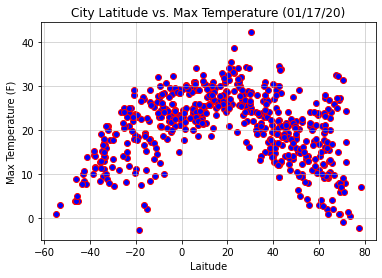

In [34]:
plt.scatter(my_weather_dict["Lat"], my_weather_dict["Max Temp"], facecolor = "blue", edgecolor = "red")

plt.title("City Latitude vs. Max Temperature (01/17/20)")

plt.xlabel("Laitude")

plt.ylabel("Max Temperature (F)")

plt.grid(linestyle='-', linewidth=1, alpha = 0.5)


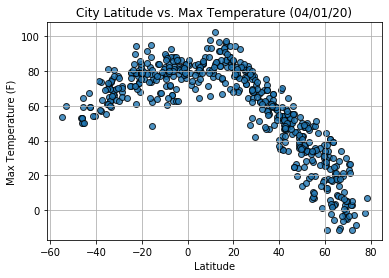

## Latitude vs. Humidity Plot

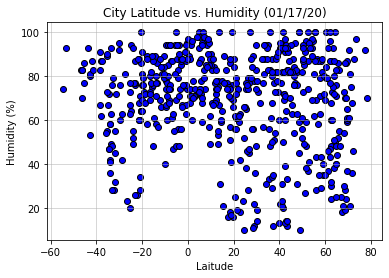

In [35]:
plt.scatter(my_weather_dict["Lat"], my_weather_dict["Humidity"], facecolor = "blue", edgecolor = "black")

plt.title("City Latitude vs. Humidity (01/17/20)")

plt.xlabel("Laitude")

plt.ylabel("Humidity (%)")

plt.grid(linestyle='-', linewidth=1, alpha = 0.5)


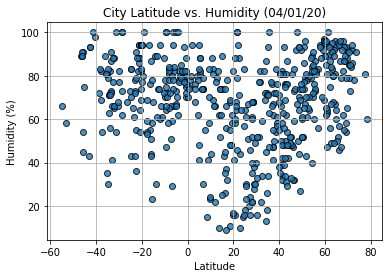

## Latitude vs. Cloudiness Plot

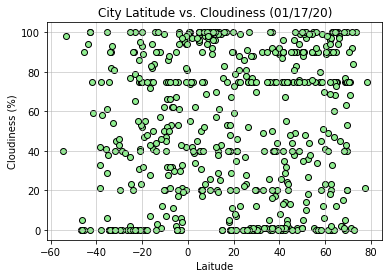

In [37]:
plt.scatter(my_weather_dict["Lat"], my_weather_dict["Cloudiness"], facecolor = "lightgreen", edgecolor = "black")

plt.title("City Latitude vs. Cloudiness (01/17/20)")

plt.xlabel("Laitude")

plt.ylabel("Cloudiness (%)")

plt.ylim(-5,105)

plt.grid(linestyle='-', linewidth=1, alpha = 0.5)


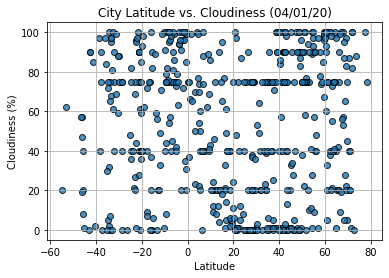

## Latitude vs. Wind Speed Plot

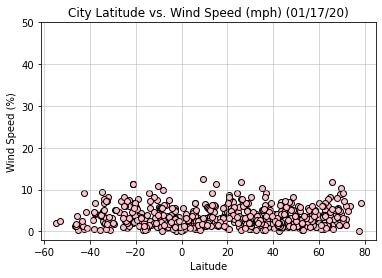

In [39]:
plt.scatter(my_weather_dict["Lat"], my_weather_dict["Wind Speed"], facecolor = "pink", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph) (01/17/20)")

plt.xlabel("Laitude")

plt.ylabel("Wind Speed (%)")

plt.ylim(-2,50)

plt.grid(linestyle='-', linewidth=1, alpha = 0.5)


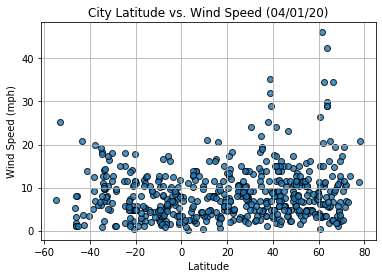

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8271188905041935


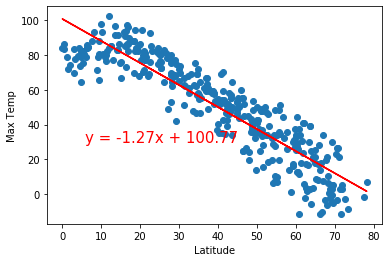

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.39936284758885965


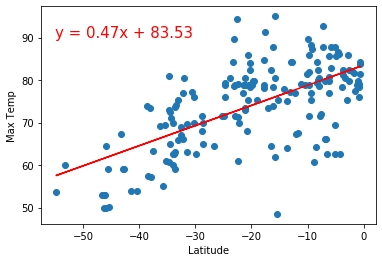

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10829462153873139


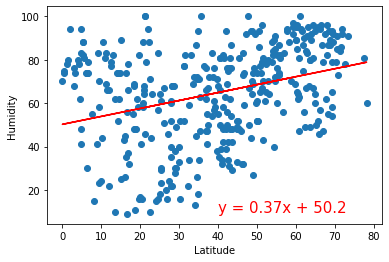

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0008996079328825663


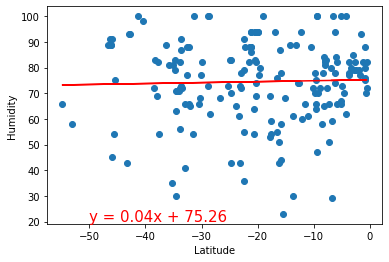

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05768812657005063


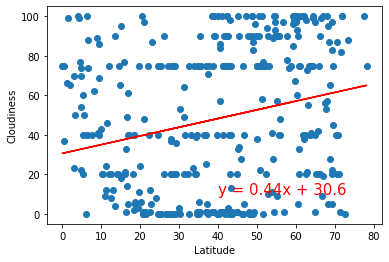

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0684912094859049


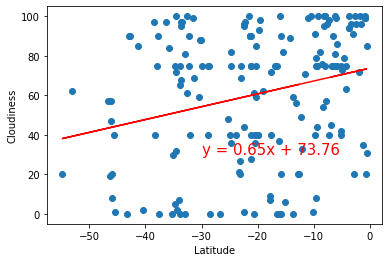

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.023371104533850804


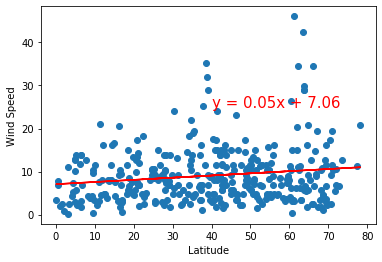

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03381889207758188


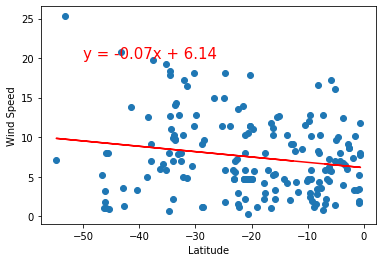